# Filters and Convolution

Filtering is a fundamental operation in image processing in which a new image is created from an input image by following some algorithm or mathematical operation. Most of the filters you will encounter follow a basic pattern of:
![filter_max](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Filters_Slide12.png)
Collect all pixel values in the neighborhood surrounding a particular target pixel in the input image.
Reduce the neighborhood of pixels values to a single value via some operation (e.g., mean, median, dot product, etc.)
In the output image, populate the pixel that corresponds to the target pixel in the input image with the value from Step 2.
Repeat Steps 1 through 3 for all pixels in the input image.

![filter_max](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Filters_Slide15.png)

At this point you might notice that, if we use a 3 x 3 window, we can't target pixels on the edge of the image. To get around this problem, we can use a technique called padding, where we add extra pixels to the input image. Here is an example of zero padding:

![padding](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Filters_Slide16.png)

You can imagine other types of padding. Another common pad is 'edge' or 'extend' where the edge pixels just repeat as far as needed to fill the neighborhood.

Note: Not all filters strictly require padding, but it's a generally useful concept to know, so it is shown here.

Here we went over an example of a Max filter, but you'll see many types of these window-based filters including but not limited to:

    Rank filters such as max, min, and median
    Filters based on descriptive statistics such as mean and standard deviation
    Convolutional filters (more on these later)

Filters have a lot of practical uses in image processing, such as:

    Smoothing out noise (despeckling)
    Expanding light or dark areas
    Highlighting regions of interest such as edges
    Calculating features for machine learning

Let's take a look at how we can use scikit-image to apply filters to our images!

![]('https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/output_files/1_Figure_5.png')


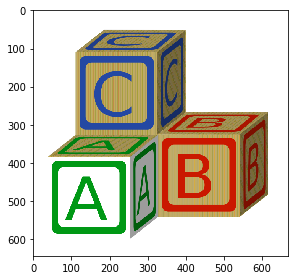

In [ ]:
from skimage import io, transform
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte, invert
blocks = io.imread('https://raw.githubusercontent.com/TheJacksonLaboratory/Basic_skimageJAX/73932c0f6e6a29822eee1220bdec18634f599369/lessons/data/abc_blocks.png')
io.imshow(blocks)


(322, 334)


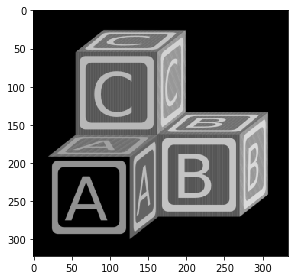

In [ ]:
blocks = transform.rescale(blocks, .5, multichannel=True)
blocks = rgb2gray(blocks)
print(blocks.shape)
blocks = invert(blocks)
blocks = img_as_ubyte(blocks)
io.imshow(blocks);

Now let's take a look at some rank filters.

First, we need to indicate the shape of the neighborhood around each pixel. This is just an array of ones and zeros, where ones indicate pixels to be included in the neighborhood and zeros indicate excluded pixels. This neighborhood indicator is often referred to as a structuring element, abbreviated in the scikit-image API as selem. In our examples in the beginning of this lesson, we used the shape (3, 3). We can create that fairly easily:

In [ ]:
from skimage import morphology
mask = morphology.square(3)
print(mask)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Using that *mask*, we can apply a Max Filter:

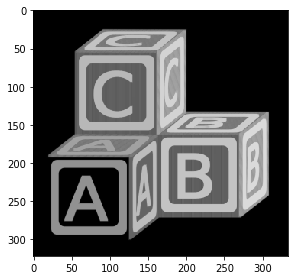

In [ ]:
from skimage.filters import rank

blocks_max = rank.maximum(blocks, mask)
io.imshow(blocks_max);

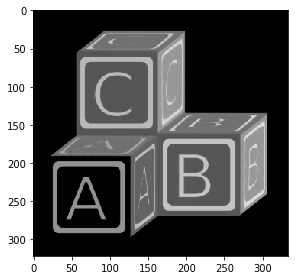

In [ ]:
blocks_min = rank.minimum(blocks, mask)
io.imshow(blocks_min);

### **Exercise**: Try different masks

use differents geometry [example](https://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py)

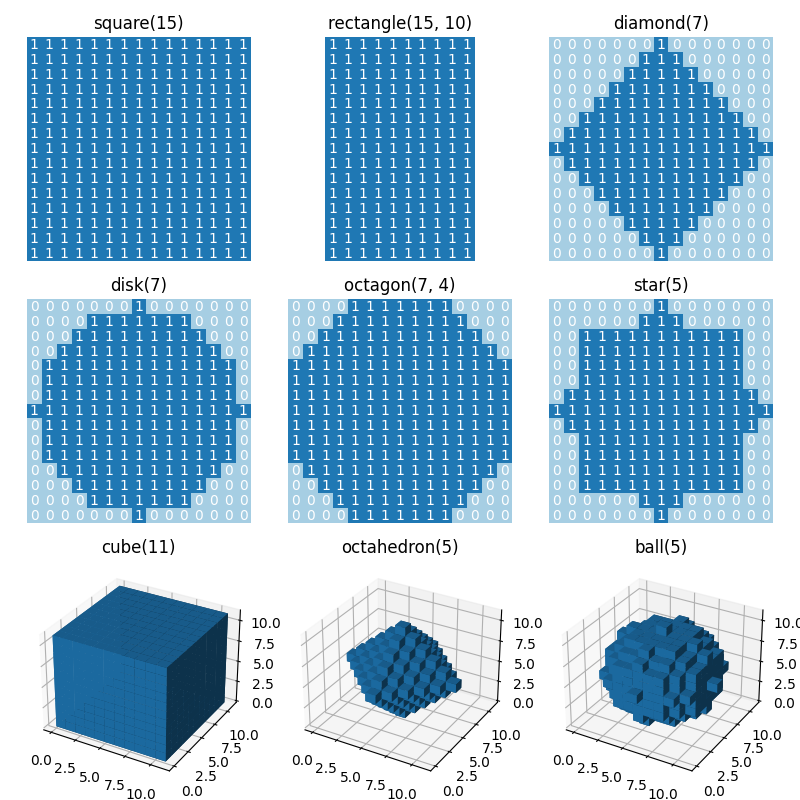

## Convolutional Filters

Filters based on [convolution](https://en.wikipedia.org/wiki/Convolution) are fundamental not only to image processing, but other aspects of [signal processing](https://en.wikipedia.org/wiki/Signal_processing) and [machine learning](https://en.wikipedia.org/wiki/Convolutional_neural_network) as well. It may be worth reading up on the mathematical basis of convolution to better understand what it entails. Here we will discuss only the specific case pertaining to image analysis.

 The basic concept of a convolutional filter is similar to the filters described above. Output image pixels are derived from a mathematical operation on a neighborhood surrounding the corresponding input image pixel. But the nature of the operation is quite different from the previous examples. Each step of a convolution entails the calculation of the [dot product](https://en.wikipedia.org/wiki/Dot_product) between the pixel values in a region of input image and corresponding values in a kernel of equal shape. The choice of the values of the kernel determines the effect of the filter.

Consider the following example, showing only one step of a convolutional filter. We take all of the pixel values of some region of input image, `(44, 237, 68, 251, 150, 238, 111, 198, 73)` and then the corresponding pixel values in our kernel `(1, 1, 1, 1, -8, 1, 1, 1, 1)` and calculate the dot product:

![Convolution_Slide1](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Convolution_Slide1.png)

So the pixel in the output image that corresponds to the `150` value in the input image will have the value `20`.

With that in mind, let's look at the case of a simple edge detector applied to a simple edge. In the input image below, there is a single vertical edge separating a dark region (all `0`) from a bright region (all `255`).

The kernel we will use for edge detection is called a [Prewitt](https://en.wikipedia.org/wiki/Prewitt_operator) operator and looks like:

```
1 0 -1
1 0 -1
1 0 -1
```

It is important to note here that when we calculate the dot product with this operator, we first flip it along both the horizonal and vertical axes before matching up corresponding values. This has to do with the mathematical basis of the convolution function. In the following examples below, we show the kernel flipped so that it is easier to match up corresponding pixel values.

For regions of all `0`, the dot product will simply be `0`.

![Convolution_Slide2](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Convolution_Slide2.png "Edge detection, step 1")

Moving down the column:

![Convolution_Slide3](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Convolution_Slide3.png "Edge detection, step 2")

Similarly, for regions where the values are all `255`, the dot product will also be zero (because the positive values resulting from the ones will exactly cancel out the values resulting from the negative ones).

![Convolution_Slide4](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Convolution_Slide4.png "Edge detection, step 3")

However, the situation is different when the operator straddles an edge. In the next example, the ones align with `255`s, whereas the negative ones align with zeros. This results in a dot product of 765.

![Convolution_Slide5](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Convolution_Slide5.png "Edge detection, step 4")

Following this operation all the way through (with [edge padding](https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.pad)) produces an output array that shows signal only over the edge in the original image (i.e., a region of high horizontal [gradient](https://en.wikipedia.org/wiki/Image_gradient)), and regions of the input image that are constant result in zeros:

![Convolution_Slide6](https://github.com/TheJacksonLaboratory/Basic_skimageJAX/raw/master/lessons/slides/Convolution_Slide6.png "Edge detection, step 5")

Now that we understand how convolutional filters work, we can try some in `scikit-image`. We'll first try the vertical Prewitt filter example we just showed.

We first use some `numpy` to create the example array:

In [ ]:
import numpy as np
a = np.zeros((5,6))
a[:, 3:] = 255
print(a)


[[  0.   0.   0. 255. 255. 255.]
 [  0.   0.   0. 255. 255. 255.]
 [  0.   0.   0. 255. 255. 255.]
 [  0.   0.   0. 255. 255. 255.]
 [  0.   0.   0. 255. 255. 255.]]


In [ ]:
from skimage import filters
edge = filters.prewitt_v(a)
print(edge)

[[  0.   0. 255. 255.   0.   0.]
 [  0.   0. 255. 255.   0.   0.]
 [  0.   0. 255. 255.   0.   0.]
 [  0.   0. 255. 255.   0.   0.]
 [  0.   0. 255. 255.   0.   0.]]


You'll notice that this output is different from our example. This is because scikit-image knows that we started with a uint8 image, and 765 is out of the range of values that are acceptable for that data type. The pixel intensities were thus rescaled, athough the output array is still float64. This is a good example of why you always want to explore the behavior of code before you use it in your analysis!

To better appreciate the utility of this filter, we can apply it to our block image:

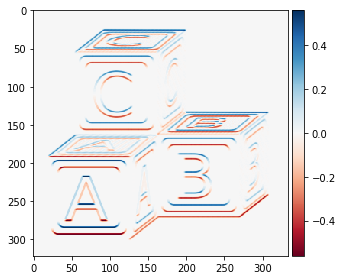

In [ ]:
block_h_edges = filters.prewitt_h(blocks)
io.imshow(block_h_edges)

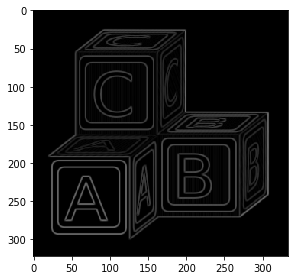

In [ ]:
block_edges = filters.prewitt(blocks)
io.imshow(block_edges)

Note here that the color scheme is different - there are no negative values because `filters.prewitt` does not capture orientation information.

Another nice edge filter is the [Laplacian](https://en.wikipedia.org/wiki/Laplace_operator) filter:

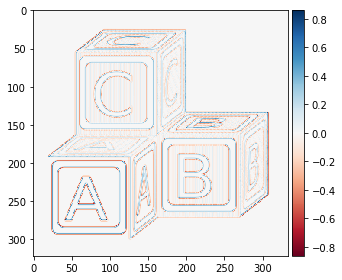

In [ ]:
block_edges2 = filters.laplace(blocks)
io.imshow(block_edges2)

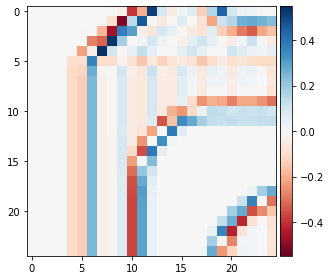

In [ ]:
io.imshow(block_edges2[50:75, 50:75])

With this filter, edges are indicated by a [zero crossing](https://en.wikipedia.org/wiki/Zero_crossing) between bands of negative and positive values.

One problem with Laplacian filters is that they are highly sensitive to noise - note that you can see plenty of "edge" signal in the zoomed-in image above. To get around this, a smoothing filter (e.g., a Gaussian filter; see below) is usually applied to images before the Laplacian filter.

## Exercise

1. Convert the astronaut image (`skimage.data.astronaut`) or another immage to grayscale and highlight edges in the picture.
2. Thicken the edges to make them stand out better.

## Gaussian filtering

The last filter we will cover in this lesson is probably the most commonly used tool in image analysis, the Gaussian filter. This filter entails convolving a two-dimensional Guassian function kernel with your input image.

Here is an example of a `(21, 21)` Gaussian kernal with a `sigma` value of 3:


(21, 21)


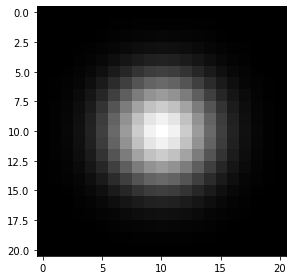

In [ ]:
from scipy.signal import gaussian as gk
gaussian_2d = gk(21, 3)[:, None] * gk(21, 3)[None, :]
print(gaussian_2d.shape)
io.imshow(gaussian_2d);

If you were to plot the intensity of pixels along a line intersecting the center point of the kernel, it would look like the classic bell-shaped Gaussian curve:

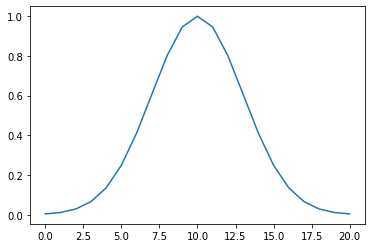

In [ ]:
import matplotlib.pyplot as plt
plt.plot(gaussian_2d[:, 10])

Gaussian filters are [low-pass filters](https://en.wikipedia.org/wiki/Low-pass_filter), which means they serve to blur your image. This will smooth out noise. Larger `sigma` values for the Gaussian kernel result in more blurring:

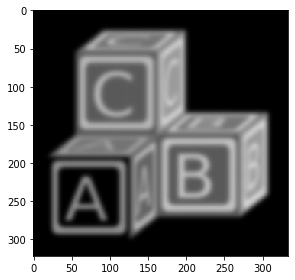

In [ ]:
blocks_blur3 = filters.gaussian(blocks, sigma=3)
io.imshow(blocks_blur3);

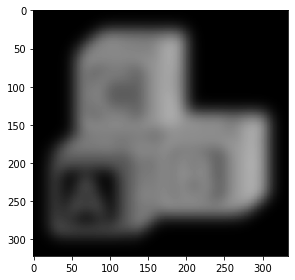

In [ ]:
blocks_blur10 = filters.gaussian(blocks, sigma=10)
io.imshow(blocks_blur10)

### Example

Let's take a look at some real data. These are stained nuclei in a brain slice:

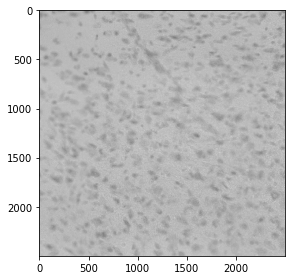

In [ ]:

cells = io.imread('https://github.com/TheJacksonLaboratory/Basic_skimageJAX/blob/73932c0f6e6a29822eee1220bdec18634f599369/lessons/data/cells.tif?raw=true')
io.imshow(cells);


We usually want bright signal on a dark background, so invert:

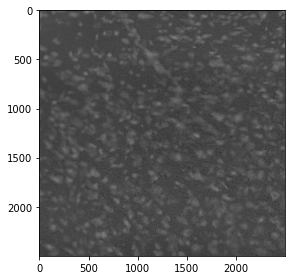

In [ ]:
cells_i = invert(cells)
io.imshow(cells_i)

Now, to find the edges of our nuclei, we might apply a Prewitt filter. But there is a lot of noise in this image, so the result is unsatisfactory:

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


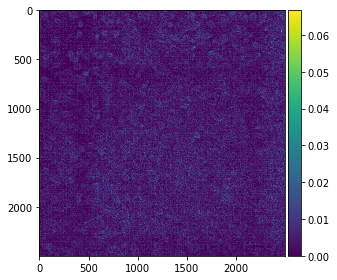

In [ ]:
cells_prewitt = filters.prewitt(cells_i)
io.imshow(cells_prewitt)

The noise overwhelms the image. We can fix our edge detector by first applying some guassian blur.

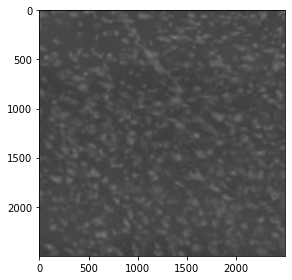

In [ ]:
cell_gaussian = filters.gaussian(cells_i, sigma=8)
io.imshow(cell_gaussian);

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


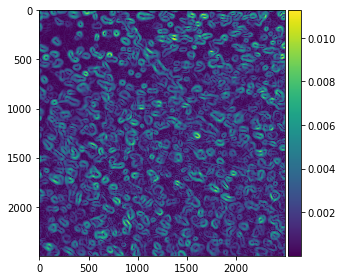

In [ ]:
cells_pog = filters.prewitt(cell_gaussian)
io.imshow(cells_pog);

his is certainly an improvement! The "edges" are a bit thick and somewhat blurry themselves, but there are some tricks for refining them (that we won't cover here).

### Exercise

1. Apply a Laplacian filter following a Gaussian blur and examine the results. Adjust the size of the `sigma` of the Gaussian. At what `sigma` value do you find the strongest response for individual nuclei?


##  Morphological operations

Morphology is the study of shapes. In image processing, some simple operations can get you a long way. The first things to learn are erosion and dilation. In erosion, we look at a pixel’s local neighborhood and replace the value of that pixel with the minimum value of that neighborhood. In dilation, we instead choose the maximum.


In [ ]:


import numpy as np
from matplotlib import pyplot as plt, cm



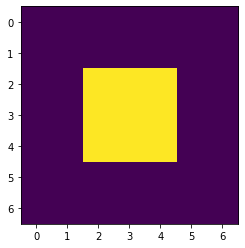

In [ ]:
image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(image);



Importantly, we must use a structuring element, which defines the local neighborhood of each pixel. To get every neighbor (up, down, left, right, and diagonals), use morphology.square; to avoid diagonals, use morphology.diamond:


In [ ]:


from skimage import morphology
sq = morphology.square(width=3)
dia = morphology.diamond(radius=1)
print(sq)
print(dia)



[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]


The central value of the structuring element represents the pixel being considered, and the surrounding values are the neighbors: a 1 value means that pixel counts as a neighbor, while a 0 value does not. So:

In [ ]:
plt.imshow( morphology.erosion(image, sq), shape=(1, 2))

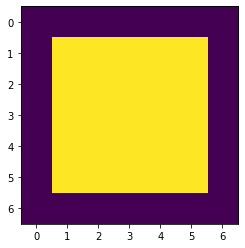

In [ ]:
plt.imshow(morphology.dilation(image, sq))

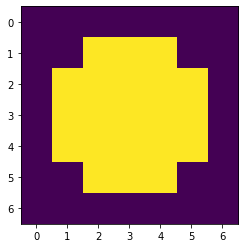

In [ ]:
plt.imshow(morphology.dilation(image, dia))



**Exercise**: use morphological operations to remove noise from a binary image.


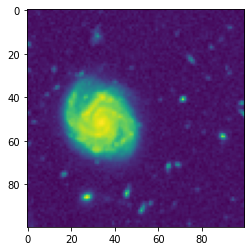

In [ ]:
from skimage import data, color
hub = color.rgb2gray(data.hubble_deep_field()[350:450, 90:190])
plt.imshow(hub);

**Based in [Basic Image Analysis with scikit-image](https://github.com/TheJacksonLaboratory/Basic_skimageJAX)**

Aditional material

[scikit-image API reference](http://scikit-image.org/docs/stable/api/api.html)

["Official" scikit-image tutorial](https://github.com/scikit-image/skimage-tutorials)

[scikit-image tutorial on YouTube](https://www.youtube.com/watch?v=pZATswy_IsQ)

## Installing

In [ ]:
## if there exist problem install the library
#!pip install -U scikit-image

In [ ]:
import skimage
print(skimage.__version__)


0.18.3
